# Impact-T fieldmap reconstruction

In [26]:
from impact import Impact, fieldmaps
from pmd_beamphysics.interfaces.impact import create_fourier_coefficients
import numpy as np

In [27]:
ifile = "/sdf/home/t/tiffan/repo/accelerator-simulator/scripts/sdf/simulations/rotate_gaussian_vary_settings_low_total_charge/ImpactT_PR10241.in"
I = Impact(input_file=ifile)

In [28]:
# Fieldmaps are stored here
I.input["fieldmaps"].keys()

dict_keys(['rfdata201', 'rfdata102'])

In [29]:
I.ele.keys()

dict_keys(['change_timestep_1', 'SC_2D_to_3D', 'GUNF', 'SOL10111', 'SQ10122', 'CQ10121', 'PR10241', 'stop_1'])

In [30]:
# Look at a solrf element.
I.ele["SOL10111"]

{'description': 'name:SOL10111',
 'original': '0.49308 0 0 105 0.0 0.0 0.0 0.0 102 0.15 0.0 0.0 0.0 0.0 0.0 0.2457 /!name:SOL10111',
 'L': 0.49308,
 'type': 'solrf',
 'zedge': 0.0,
 'rf_field_scale': 0.0,
 'rf_frequency': 0.0,
 'theta0_deg': 0.0,
 'filename': 'rfdata102',
 'radius': 0.15,
 'x_offset': 0.0,
 'y_offset': 0.0,
 'x_rotation': 0.0,
 'y_rotation': 0.0,
 'z_rotation': 0.0,
 'solenoid_field_scale': 0.2457,
 's': 0.49308,
 'name': 'SOL10111'}

In [31]:
I.ele["SOL10111"]["filename"]

'rfdata102'

In [32]:
# This is its fieldmap filename
I.ele["CQ10121"]

{'description': 'name:CQ10121',
 'original': '0.36 0 0 1 0.01601  0.0 0.210 0.0254 0.0 0.0 0.0 0.0 0 /!name:CQ10121',
 'L': 0.36,
 'type': 'quadrupole',
 'zedge': 0.01601,
 'b1_gradient': 0.0,
 'L_effective': 0.21,
 'radius': 0.0254,
 'x_offset': 0.0,
 'y_offset': 0.0,
 'x_rotation': 0.0,
 'y_rotation': 0.0,
 'z_rotation': 0.0,
 's': 0.37601,
 'name': 'CQ10121'}

In [33]:
SOL_field_length = I.ele["SOL10111"]['s']

In [34]:
CQ_field_length = I.ele["CQ10121"]['s']

In [35]:
GUNF_field_length = I.ele["GUNF"]['s']

In [36]:
I.ele["GUNF"]

{'description': 'name:GUNF',
 'original': '0.15 0 0 105 0.0 47537665.05908992 2856000000.0 303.93723122804266 201 0.15 0.0 0.0 0.0 0.0 0.0 0.0 /!name:GUNF',
 'L': 0.15,
 'type': 'solrf',
 'zedge': 0.0,
 'rf_field_scale': 47537665.05908992,
 'rf_frequency': 2856000000.0,
 'theta0_deg': 303.93723122804266,
 'filename': 'rfdata201',
 'radius': 0.15,
 'x_offset': 0.0,
 'y_offset': 0.0,
 'x_rotation': 0.0,
 'y_rotation': 0.0,
 'z_rotation': 0.0,
 'solenoid_field_scale': 0.0,
 's': 0.15,
 'name': 'GUNF'}

In [37]:
# That data is here.
fmap = I.input["fieldmaps"]["rfdata102"]
fmap

{'info': {'format': 'solrf',
  'filePath': '/sdf/home/t/tiffan/repo/accelerator-simulator/scripts/sdf/simulations/rotate_gaussian_vary_settings_low_total_charge/rfdata102'},
 'field': {'Ez': {'z0': 0.0,
   'z1': 0.0,
   'L': 0.0,
   'fourier_coefficients': array([0.])},
  'Bz': {'z0': -0.53308,
   'z1': 0.49308,
   'L': 1.02616,
   'fourier_coefficients': array([ 7.59104159e-01,  1.86860998e-01,  2.68209187e-09, -4.75732117e-01,
           5.68488796e-09, -2.63303014e-01, -2.00685489e-10,  8.31385362e-02,
          -1.07061180e-09,  3.32147505e-02,  3.34109023e-09, -4.03166145e-03,
           2.36977653e-09,  7.55695585e-02,  7.03628508e-09,  4.05472421e-02,
          -7.93679210e-09, -2.78630279e-02, -2.80674359e-08, -1.23309101e-02,
          -1.21750197e-08, -1.11917490e-03,  2.72183881e-08, -1.76941899e-02,
           2.07775590e-08, -6.82928971e-03, -4.64611502e-09,  9.04327137e-03,
          -2.74644209e-08,  3.46208848e-03,  1.22819960e-08,  4.56318358e-04,
           2.11520498

In [38]:
# Reconstruction function
fieldmaps.fieldmap_reconstruction_solrf(fmap["field"]["Bz"], 0)

0.006497827018877966

# Basic plot

In [39]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
%config InlineBackend.figure_format='retina'

In [40]:
fieldlist = [
    fieldmaps.fieldmap_reconstruction_solrf(fmap["field"]["Bz"], z) if z < SOL_field_length else 0 
    for z in zlist
]

In [41]:
# z at max field
zlist[np.argmax(np.array(fieldlist))]

0.19494494494494494

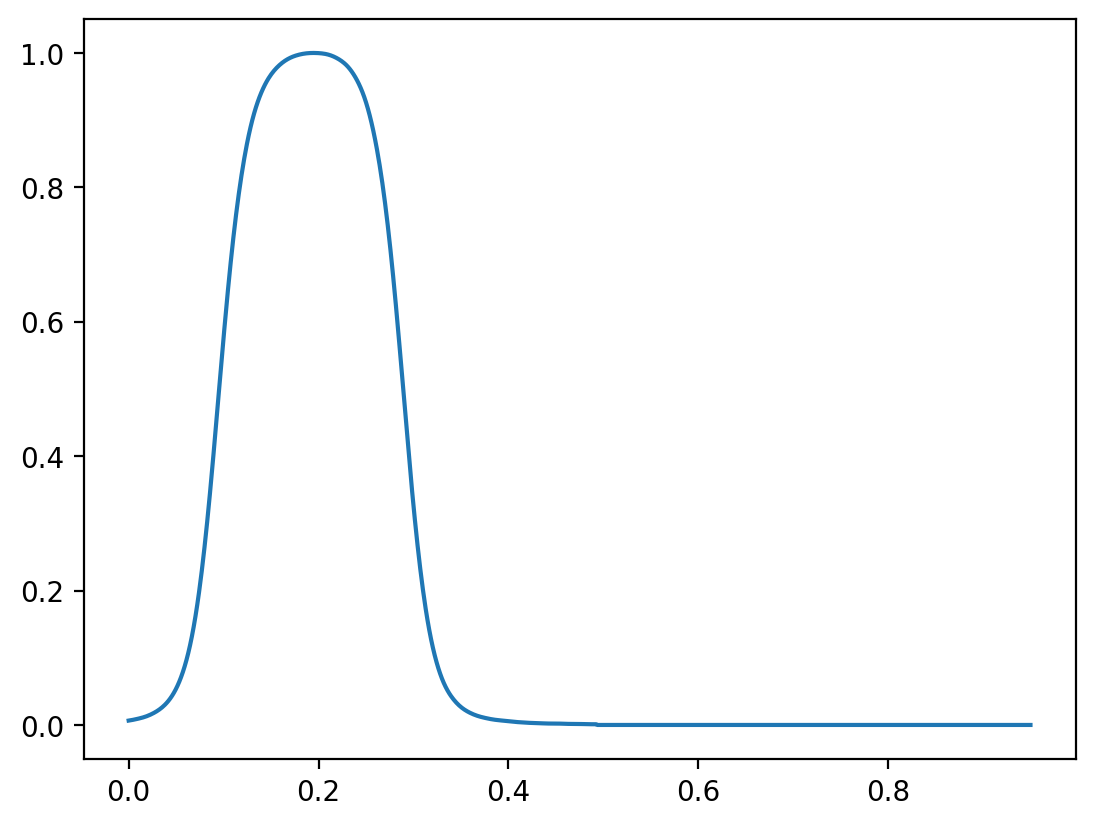

In [42]:
plt.plot(zlist, fieldlist);

In [43]:
# Integrated field (approximate)
field_scale = 0.243  # from imput file
BL = np.sum(fieldlist) * 0.49308 / 1000  # T*m
BL * field_scale * 10  # T*m -> kG*m

0.24525028016068678

In [44]:
1 / BL

9.908245562075917

# Create Fieldmap

In [45]:
fmap2 = fmap.copy()
fmap2["field"]["Bz"]["z0"] = min(zlist)
fmap2["field"]["Bz"]["z1"] = max(zlist)
fmap2["field"]["Bz"]["L"] = np.ptp(zlist)
fmap2["field"]["Bz"]["fourier_coefficients"] = create_fourier_coefficients(
    zlist, fieldlist, n=20
)

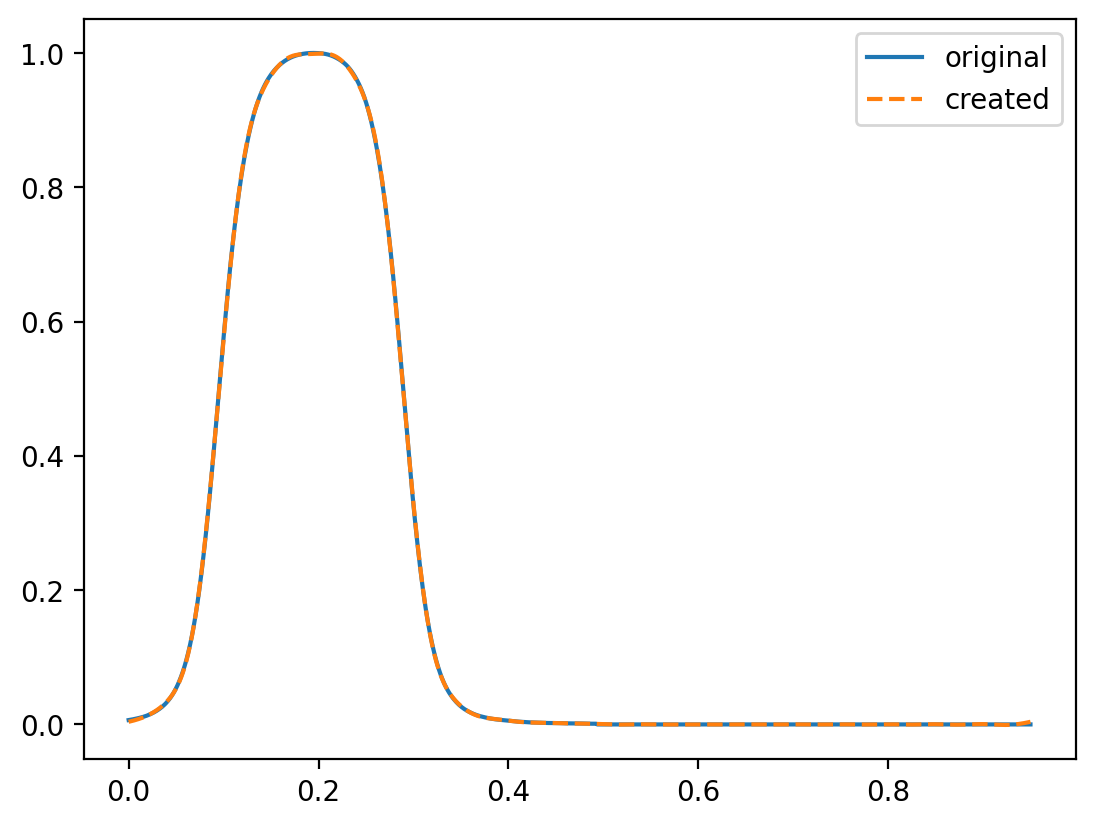

In [46]:
fieldlist2 = [
    fieldmaps.fieldmap_reconstruction_solrf(fmap2["field"]["Bz"], z) for z in zlist
]
plt.plot(zlist, fieldlist, label="original")
plt.plot(zlist, fieldlist2, "--", label="created")
plt.legend()

In [47]:
fmap2

{'info': {'format': 'solrf',
  'filePath': '/sdf/home/t/tiffan/repo/accelerator-simulator/scripts/sdf/simulations/rotate_gaussian_vary_settings_low_total_charge/rfdata102'},
 'field': {'Ez': {'z0': 0.0,
   'z1': 0.0,
   'L': 0.0,
   'fourier_coefficients': array([0.])},
  'Bz': {'z0': 0.0,
   'z1': 0.95,
   'L': 0.95,
   'fourier_coefficients': array([ 4.09772832e-01, -1.09498049e-01, -3.58401808e-01, -2.34960685e-01,
           1.59519923e-01,  1.33430096e-01,  1.06251988e-01,  2.49384975e-02,
          -6.28418265e-02,  3.88093217e-03, -5.45007482e-04, -9.16533191e-03,
          -3.69630332e-02, -3.64535906e-02,  2.13838030e-02,  2.16058954e-02,
           1.99756534e-02,  5.08285268e-03, -1.05651922e-02,  2.46800436e-03,
           4.24932675e-04, -1.43308189e-03, -9.33652749e-03, -8.57130479e-03,
           4.40584287e-03,  4.30403457e-03,  4.26117259e-03,  8.88068952e-04,
          -1.51900264e-03,  1.24746015e-03,  1.28230183e-04, -2.28337028e-04,
          -2.36502692e-03, -2.04

In [48]:
from numpy import sin, cos, pi, arange

In [49]:
# Raw data from
coefs = fmap2["field"]["Bz"]["fourier_coefficients"]
coefs

array([ 4.09772832e-01, -1.09498049e-01, -3.58401808e-01, -2.34960685e-01,
        1.59519923e-01,  1.33430096e-01,  1.06251988e-01,  2.49384975e-02,
       -6.28418265e-02,  3.88093217e-03, -5.45007482e-04, -9.16533191e-03,
       -3.69630332e-02, -3.64535906e-02,  2.13838030e-02,  2.16058954e-02,
        1.99756534e-02,  5.08285268e-03, -1.05651922e-02,  2.46800436e-03,
        4.24932675e-04, -1.43308189e-03, -9.33652749e-03, -8.57130479e-03,
        4.40584287e-03,  4.30403457e-03,  4.26117259e-03,  8.88068952e-04,
       -1.51900264e-03,  1.24746015e-03,  1.28230183e-04, -2.28337028e-04,
       -2.36502692e-03, -2.04514817e-03,  7.23568827e-04,  7.61356141e-04,
        1.09566038e-03,  1.72196270e-04, -2.60248364e-04])

In [50]:
A0 = coefs[0]  # constant factor
A = coefs[1::2]  # cos parts
B = coefs[2::2]  # sin parts

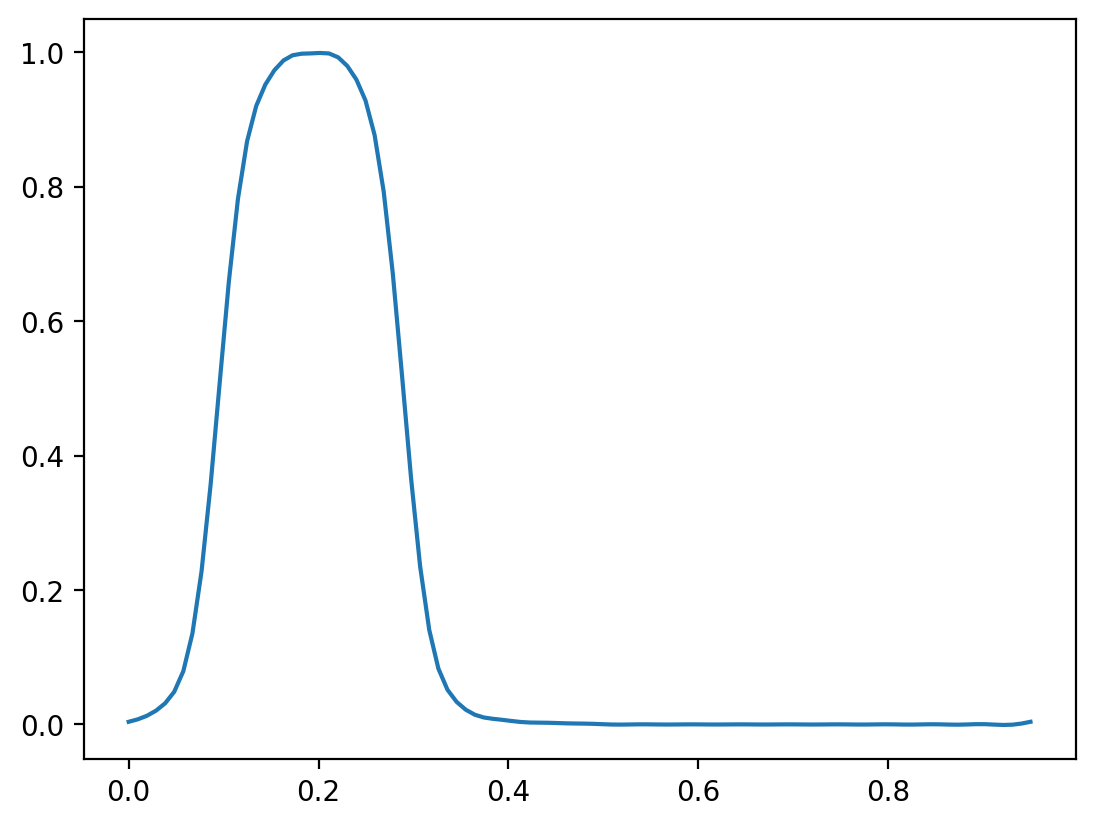

In [51]:
L = 0.95


@np.vectorize
def f(z):
    phase = 2 * pi * (z / L - 1 / 2)
    return A0 / 2 + sum(
        [
            A[n - 1] * cos(n * phase) + B[n - 1] * sin(n * phase)
            for n in arange(1, len(A) + 1)
        ]
    )


z0 = np.linspace(0, L, 100)

plt.plot(z0, f(z0))

In [52]:
fmap_gun = I.input["fieldmaps"]["rfdata201"]


In [53]:
zlist = np.linspace(0, 0.95, 1000)

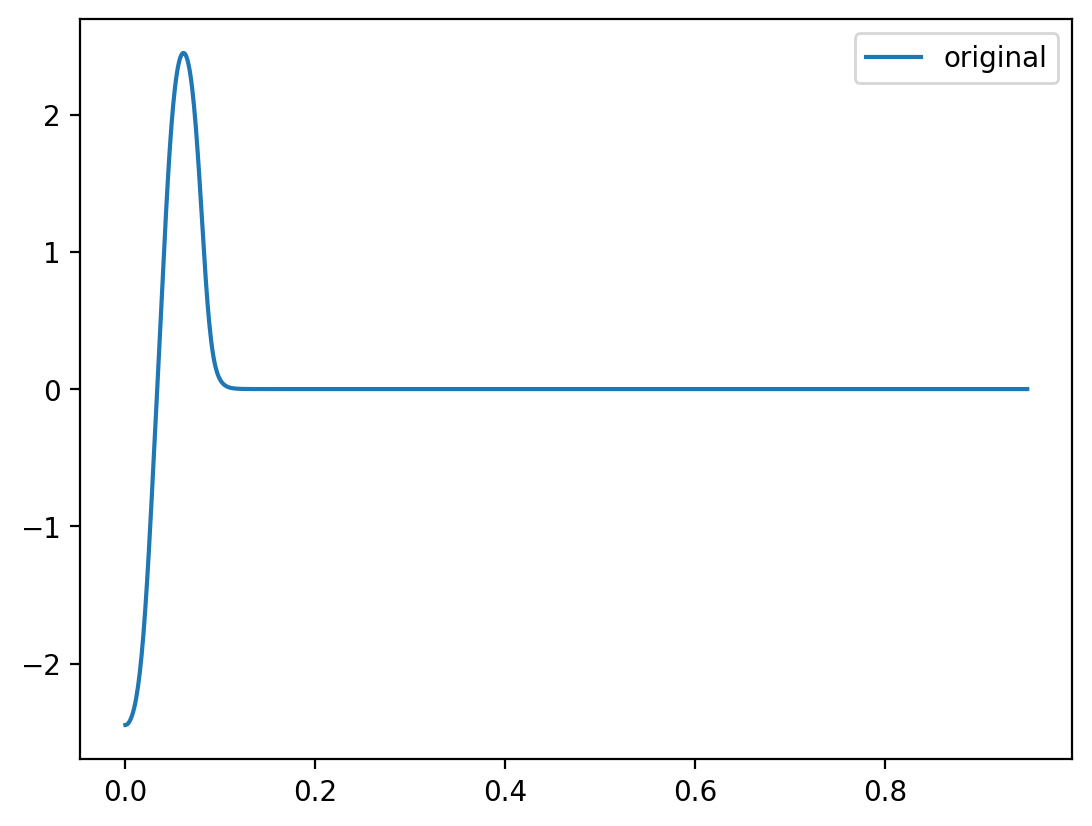

In [59]:
fieldlist_gun = [
    fieldmaps.fieldmap_reconstruction_solrf(fmap_gun["field"]["Ez"], z) if z < GUNF_field_length else 0
    for z in zlist
]
plt.plot(zlist, fieldlist_gun, label="original")
# plt.plot(zlist, fieldlist2, "--", label="created")
plt.legend()

In [ ]:
def quad_fringe_field(z, z0=0.075, g=0.0508, c1=0.0004, c2=4.518219):
    """
    Compute the quadrupole fringe-field factor from IMPACT-T Equation (55).

    Parameters
    ----------
    z : float or np.ndarray
        The longitudinal coordinate(s) at which to evaluate the fringe field.
    z0 : float
        The shift, often (total_length - effective_length)/2 in the lattice.
    g : float
        A length scale (related to the half-fringe region).
    c1 : float, optional
        The first fit constant (default 0.0004 in IMPACT-T).
    c2 : float, optional
        The second fit constant (default 4.518219 in IMPACT-T).

    Returns
    -------
    np.ndarray or float
        The dimensionless fringe-field factor B_g(0,0,z)/B0.
    """
    # Dimensionless coordinate
    s = (z - z0) / g
    
    # Logistic-style soft-edge function
    return 1.0 / (1.0 + np.exp(c1 + c2*s))

In [61]:
# Evaluate the fringe-field factor for each z in zlist
fieldlist_quad = [quad_fringe_field(z) for z in zlist]

# Plot
plt.figure(figsize=(6,4))
plt.plot(zlist, fieldlist_quad, label="Quad Fringe Field")
plt.xlabel("z (m)")
plt.ylabel("Field Factor")
plt.title("Quadrupole Fringe Field vs. z")
plt.legend()

TypeError: quad_fringe_field() missing 2 required positional arguments: 'z0' and 'g'